  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

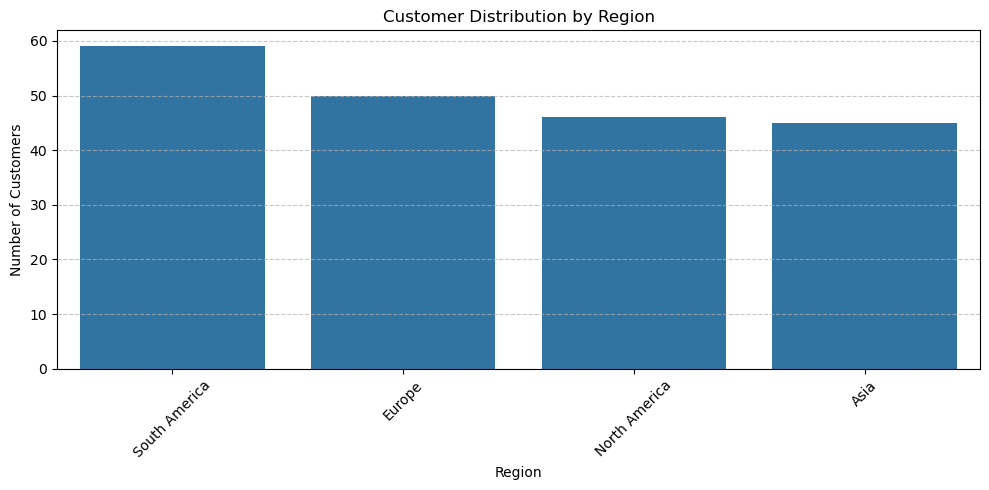

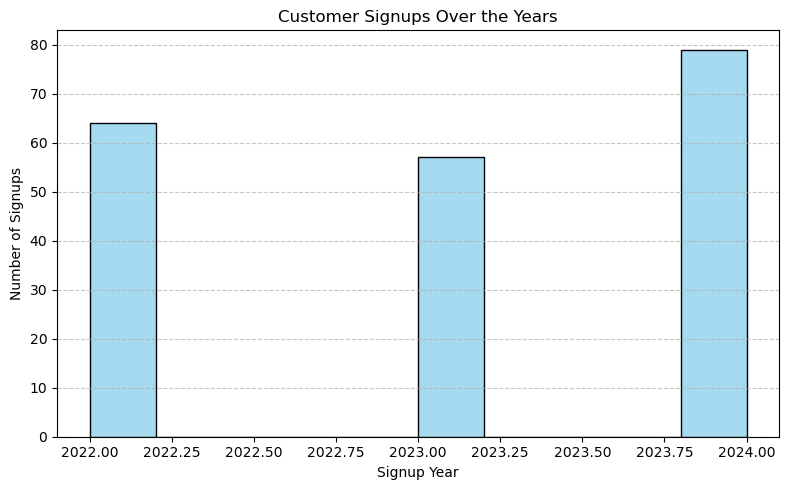

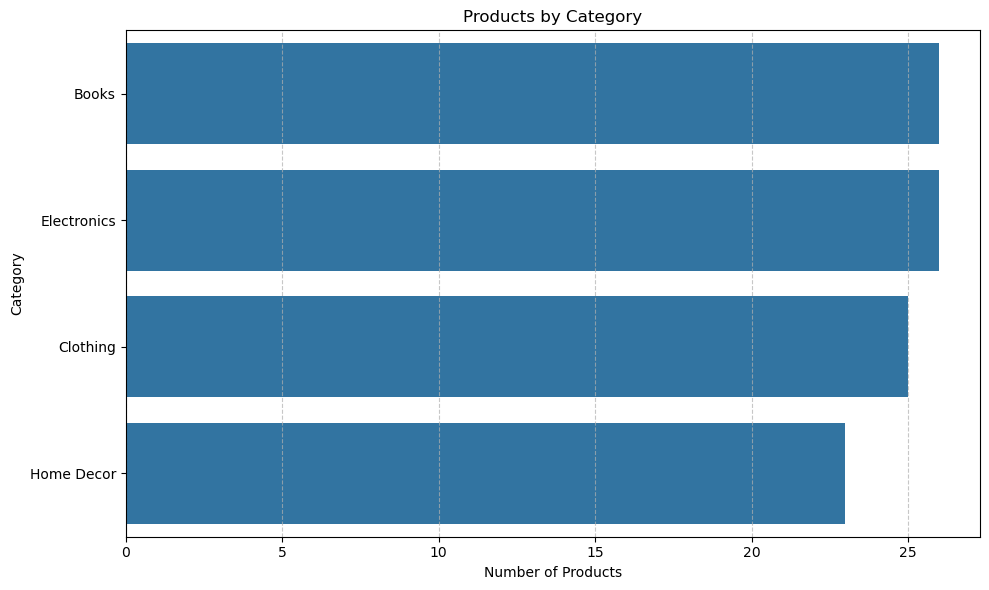

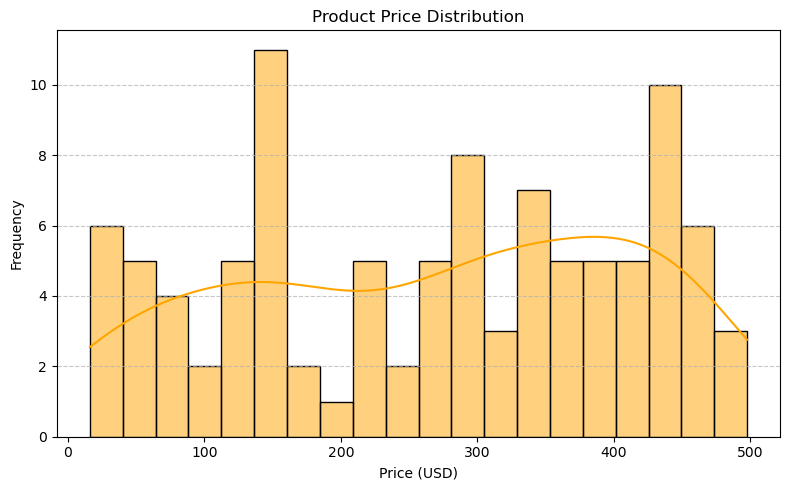

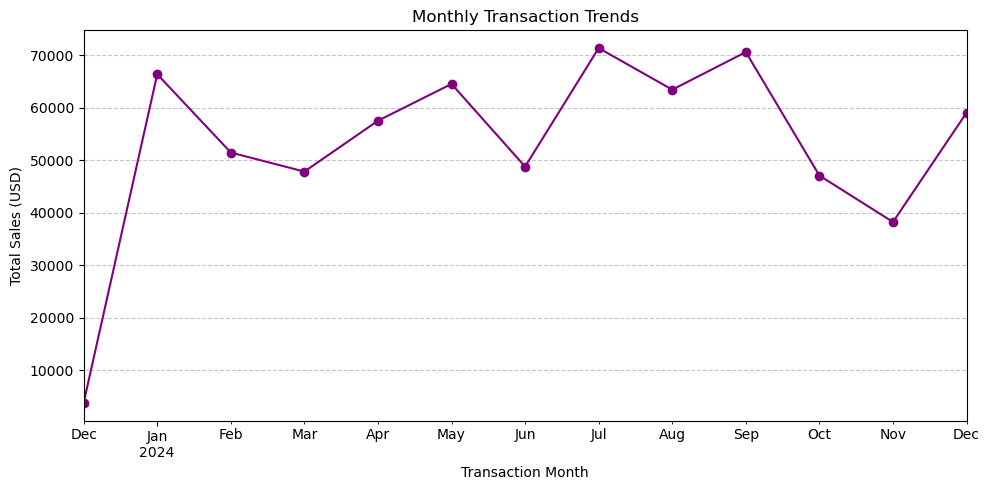

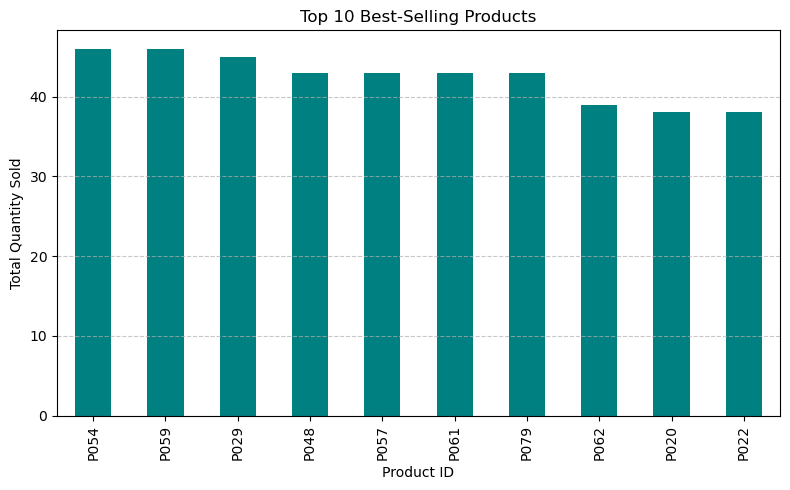

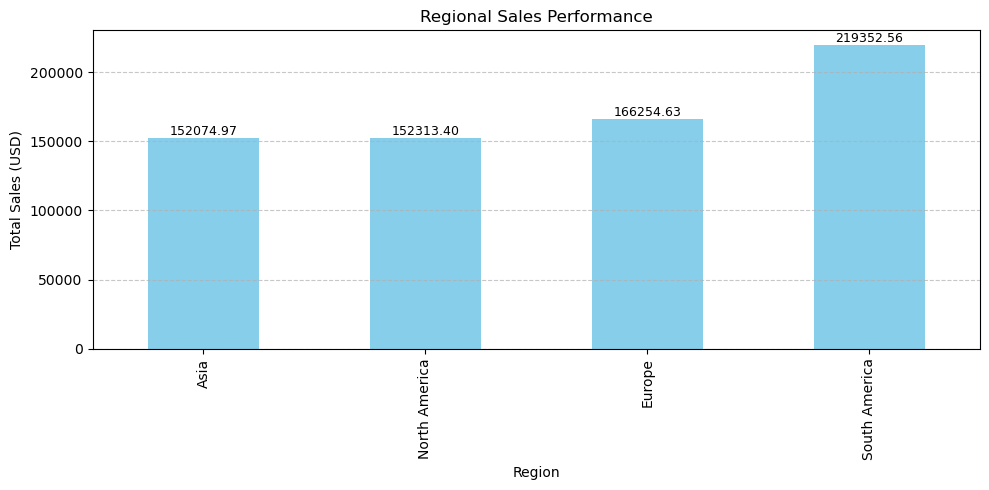

Script executed successfully! All visualizations saved.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets with error handling
try:
    customers = pd.read_csv(r"C:\DataSciProject\Customers.csv")
    products = pd.read_csv(r"C:\DataSciProject\Products.csv")
    transactions = pd.read_csv(r"C:\DataSciProject\Transactions.csv")
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()
except Exception as e:
    print(f"Unexpected error: {e}")
    exit()

# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())

# Check for null values and duplicates
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print("\nDuplicate Rows:")
print(f"Customers: {customers.duplicated().sum()}")
print(f"Products: {products.duplicated().sum()}")
print(f"Transactions: {transactions.duplicated().sum()}")

# Handle missing values
customers.fillna({'Region': 'Unknown'}, inplace=True)
products['Price'] = products['Price'].fillna(products['Price'].mean())
transactions.dropna(inplace=True)

# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Add derived columns
customers['SignupYear'] = customers['SignupDate'].dt.year
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Regional distribution of customers
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('customer_distribution_by_region.png')
plt.show()

# Signup trends over years
plt.figure(figsize=(8, 5))
sns.histplot(customers['SignupYear'], kde=False, bins=10, color='skyblue')
plt.title('Customer Signups Over the Years')
plt.xlabel('Signup Year')
plt.ylabel('Number of Signups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('signup_trends_over_years.png')
plt.show()

# Product categories distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index)
plt.title('Products by Category')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('product_categories_distribution.png')
plt.show()

# Product price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, bins=20, color='orange')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('product_price_distribution.png')
plt.show()

# Monthly sales trends
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', color='purple', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_trends.png')
plt.show()

# Top 10 best-selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='teal')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_best_selling_products.png')
plt.show()

# Merge datasets
merged = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')

# Regional sales performance
regional_sales = merged.groupby('Region')['TotalValue'].sum().sort_values()
plt.figure(figsize=(10, 5))
regional_sales.plot(kind='bar', color='skyblue')
plt.title('Regional Sales Performance')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add annotations
for index, value in enumerate(regional_sales):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('regional_sales_performance.png')
plt.show()

#print("Script executed successfully! All visualizations saved.")
